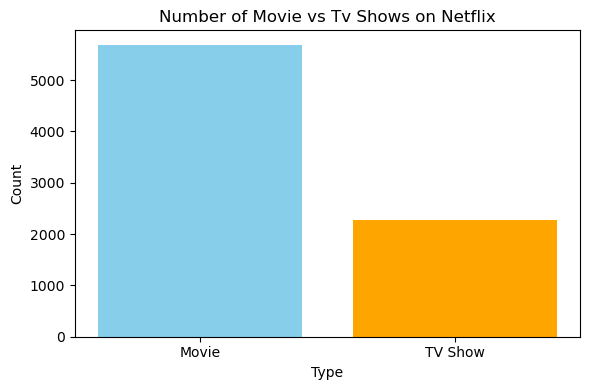

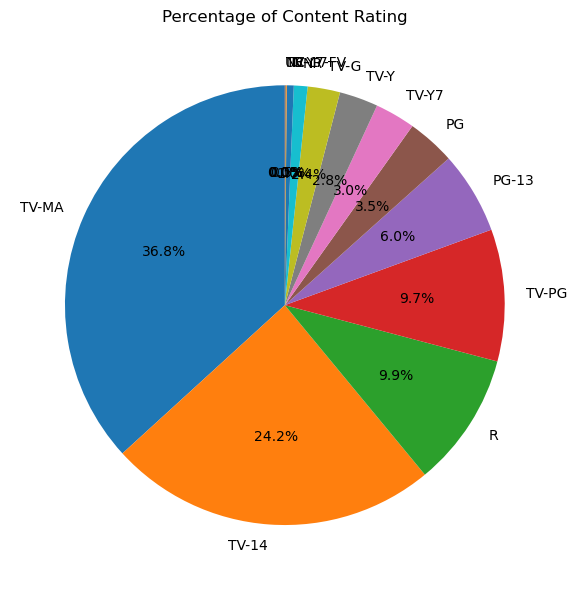

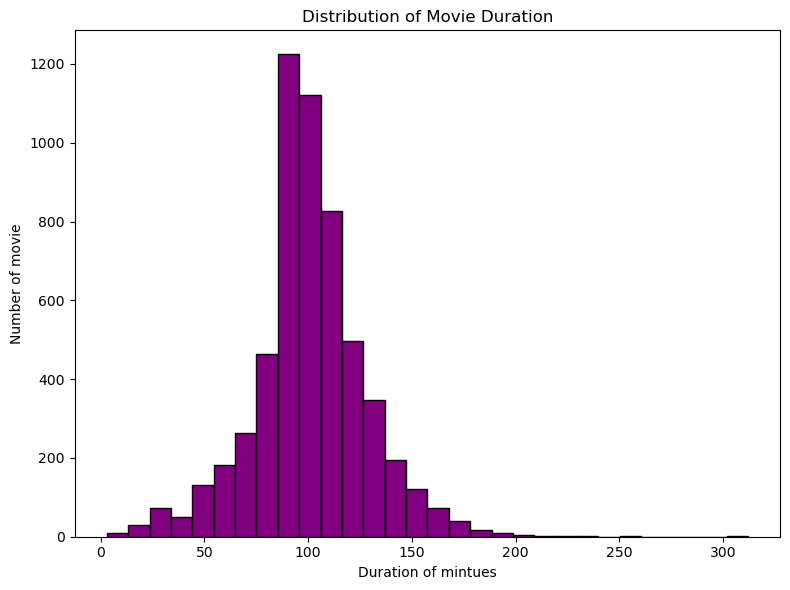

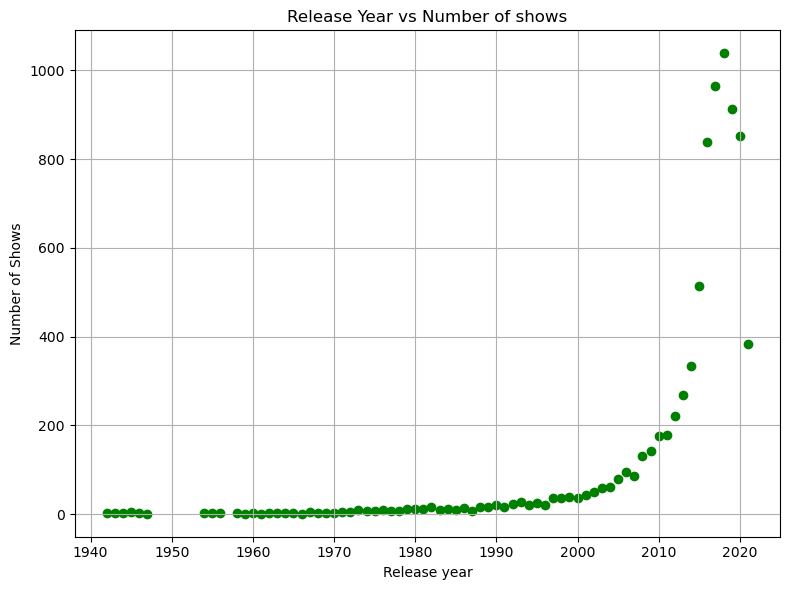

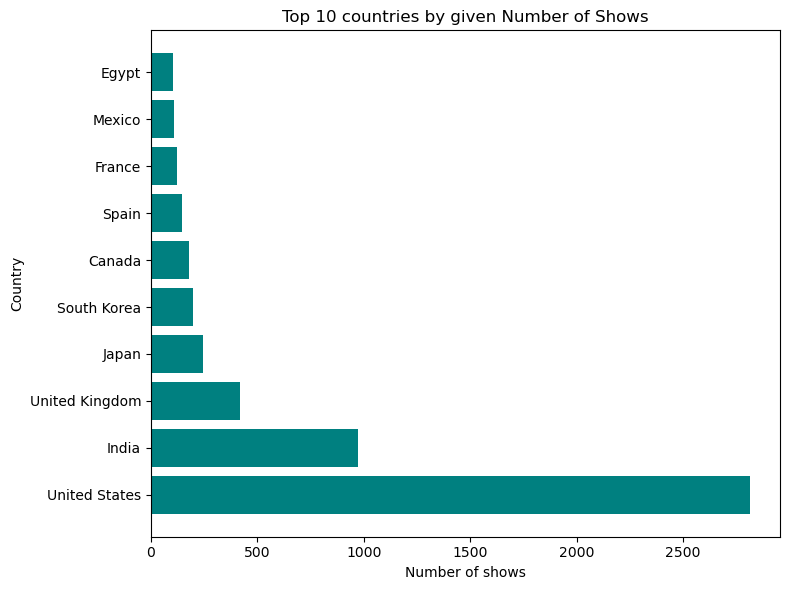

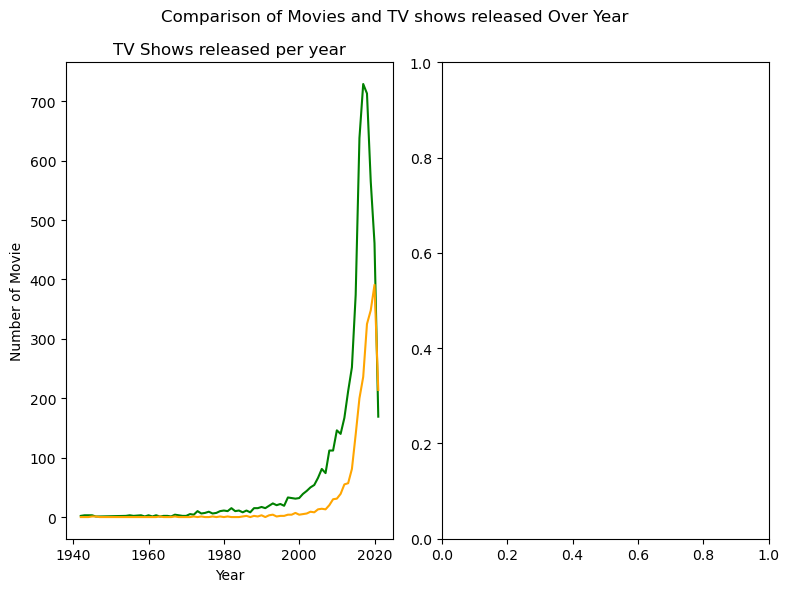

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")

# Clean data
df = df.dropna(subset=["type","country","release_year","duration","rating"])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=["skyblue","orange"])
plt.title("Number of Movie vs Tv Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("Movie_vs_Tv_shows.png")
plt.show()

rating_counts = df["rating"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct="%1.1f%%",startangle=90)
plt.title("Percentage of Content Rating")
plt.tight_layout()
plt.savefig("Content_Rating_pie.png")
plt.show()

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype('int')
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor="black")
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration of mintues")
plt.ylabel("Number of movie")
plt.tight_layout()
plt.savefig("movie_duration_hist.png")
plt.show()

release_counts = df["release_year"].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.scatter(release_counts.index,release_counts.values,color='green')
plt.title("Release Year vs Number of shows")
plt.xlabel("Release year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.grid(True)
plt.savefig("release year Scatter.png")
plt.show()

country_count = df["country"].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_count.index,country_count.values,color="teal")
plt.title("Top 10 countries by given Number of Shows")
plt.xlabel("Number of shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("top_10_countries.png")
plt.show()

content_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax = plt.subplots(1,2,figsize=(8,6))

# First subplot : Movies
ax[0].plot(content_year.index,content_year['Movie'],color='green')
ax[0].set_title("Movie released per year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movie")

# Second subplot : TV Shows

ax[0].plot(content_year.index,content_year['TV Show'],color='orange')
ax[0].set_title("TV Shows released per year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movie")

fig.suptitle("Comparison of Movies and TV shows released Over Year")
plt.tight_layout()
plt.savefig("Released_per_year_movie_and_tv-shows.png")
plt.show()




